<a href="https://colab.research.google.com/github/CEMPAplicaciones/MIA/blob/main/Modulo_2/2_3_3_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesado de datos

El preprocesado de datos es una etapa crucial en el desarrollo de modelos de aprendizaje automático y abarca varios procesos fundamentales:

1. **Limpieza de Datos**:
   - **Tratamiento de Valores Faltantes**: Pueden ser rellenados con un valor específico, la media, la mediana, etc.
   - **Eliminación de Duplicados**: Borrar o tratar las observaciones duplicadas.
   - **Eliminación de Outliers**: Identificar y tratar valores atípicos que pueden sesgar el modelo.

2. **Transformación de Datos**:
   - **Normalización y Escalado**: Cambio de escala de los datos para que todos estén en un rango similar.
   - **Codificación de Variables Categóricas**: Convertir categorías en una forma que el modelo pueda entender, como el One-Hot Encoding.
   - **Transformación de Características**: Crear nuevas características a partir de las existentes, como la combinación de variables, funciones polinómicas, etc.

3. **Reducción de Dimensionalidad**:
   - **Selección de Características**: Escoger las características más importantes que contribuyen al rendimiento del modelo.
   - **Técnicas de Reducción**: Utilizar técnicas como el Análisis de Componentes Principales (PCA) para reducir la complejidad de los datos sin perder información relevante.

4. **Partición de Datos**:
   - **División en Conjuntos de Entrenamiento, Validación y Prueba**: Esto permite evaluar el rendimiento del modelo en diferentes etapas y asegura que el modelo no se ajuste excesivamente a los datos.

5. **Manejo de Datos Desbalanceados**:
   - **Submuestreo y Sobremuestreo**: Técnicas para tratar con conjuntos de datos en los cuales una clase está sobrerrepresentada en comparación con la otra.

7. **Análisis Exploratorio de Datos (EDA)**:
   - **Visualización**: Gráficos y tablas para entender la naturaleza y relaciones entre las variables.
   - **Estadísticas Descriptivas**: Suministra una comprensión inicial de los datos a través de métricas como la media, mediana, desviación estándar, etc.

In [45]:
# Cargamos rich para enriquecer texto
from rich.console import Console
console = Console()

# Cargamos las librerías de trabajo habituales
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [46]:
# Utilizaremos el conjunto de datos de la flor de iris
from sklearn.datasets import load_iris
iris  = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
# Add target
data['species'] = iris['target']

In [47]:
console.rule("[blue] Información sobre los datos de trabajo [/blue]")
console.log(data.head())
console.log(f"\n Descripción de los datos ============= \n\n {data.describe()}")

────────────────────────────────────  Información sobre los datos de trabajo  ─────────────────────────────────────

[16:00:38]    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width  ]8;id=683190;file:///tmp/ipython-input-47-4059693972.py\ipython-input-47-4059693972.py]8;;\:]8;id=746484;file:///tmp/ipython-input-47-4059693972.py#2\2]8;;\
           (cm)  \                                                                                                 
           0                5.1               3.5                1.4                                               
           0.2                                                                                                     
           1                4.9               3.0                1.4                                               
           0.2                                                                                                     
           2                4.7               3.2                1.3                                               
           0.2                                                                                                     
           3                4.6               3.1                1.5                                               
           0.2                                                                                                     
           4                5.0               3.6                1.4                                               
           0.2                                                                                                     
                                                                                                                   
              species                                                                                              
           0        0                                                                                              
           1        0                                                                                              
           2        0                                                                                              
           3        0                                                                                              
           4        0                                                                                              

                                                                                   ]8;id=281067;file:///tmp/ipython-input-47-4059693972.py\ipython-input-47-4059693972.py]8;;\:]8;id=341679;file:///tmp/ipython-input-47-4059693972.py#3\3]8;;\
            Descripción de los datos =============                                                                 
                                                                                                                   
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \                                       
           count         150.000000        150.000000         150.000000                                           
           mean            5.843333          3.057333           3.758000                                           
           std             0.828066          0.435866           1.765298                                           
           min             4.300000          2.000000           1.000000                                           
           25%             5.100000          2.800000           1.600000                                           
           50%             5.800000          3.000000           4.350000                                           
           75%             6.400000          3.300000           5.100000                                           
           max             7.900000          4.400000           6.900000                                           
                                                                                                                   
                  petal width (cm)     species                                                                     
           count        150.000000  150.000000                                                                     
           mean           1.199333    1.000000                                                                     
           std            0.762238    0.819232                                                                     
           min            0.100000    0.000000                                                                     
           25%            0.300000    0.000000                                                                     
           50%            1.300000    1.000000                                                                     
           75%            1.800000    2.000000                                                                     
           max            2.500000    2.000000                                                                     

### Generación de NaNs para el ejercicio

In [48]:
# Introduciomos algunos datos faltantes aleatoriamente

def generate_nans(data):
  np.random.seed(42) # Semilla para la reproducibilidad

  # Fracción de valores a convertir en NaN (por ejemplo, el 5%)
  fraction = 0.05

  # Máscara para seleccionar entradas
  mask = np.random.rand(*data.shape) < fraction

  # Conversión de las entradas seleccionadas en NaN
  data[mask] = np.nan

# Generamos los datos faltantes
generate_nans(data)


In [49]:
# Copiamos el dataset para usar un nombre más adecuado
data_with_nans = data.copy()

# Comprobando si hay valores faltantes
# La detección de datos faltantes es crítica en análisis médico
missing_values = data_with_nans.isna()
console.print(f"\n - Hay datos faltantes como NaNs:\n", missing_values.head())

# También puedes usar isnull() (Equivalente al anterior, pero se recomienda el método isna())
missing_values = data_with_nans.isnull()
console.print(f"\n - Hay datos faltantes como nulos:\n", missing_values.head())

# Cuántos valores faltantes o NaNs contiene el dataset:
console.rule("Datos faltantes")
console.print("Número de datos faltantes:\n", data_with_nans.isna().sum())

# Análisis más detallado de datos faltantes
print(f"\nResumen de datos faltantes:")
print(f"  Total de valores: {data_with_nans.size}")
print(f"  Valores faltantes: {data_with_nans.isna().sum().sum()}")
print(f"  Porcentaje faltante: {(data_with_nans.isna().sum().sum() / data_with_nans.size) * 100:.2f}%")

# Filas con al menos un valor faltante
filas_con_faltantes = data_with_nans.isna().any(axis=1).sum()
print(f"  Filas con datos faltantes: {filas_con_faltantes} ({filas_con_faltantes/len(data_with_nans)*100:.1f}%)")

- Hay datos faltantes como NaNs:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              False             False              False             False   
1              False             False              False             False   
2               True             False              False             False   
3              False             False              False             False   
4              False             False              False             False   

   species  
0    False  
1    False  
2    False  
3    False  
4    False

- Hay datos faltantes como nulos:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              False             False              False             False   
1              False             False              False             False   
2               True             False              False             False   
3              False             False              False             False   
4              False             False              False             False   

   species  
0    False  
1    False  
2    False  
3    False  
4    False

───────────────────────────────────────────────── Datos faltantes ─────────────────────────────────────────────────

Número de datos faltantes:
 sepal length (cm)    11
sepal width (cm)      6
petal length (cm)    10
petal width (cm)      7
species               5
dtype: int64


Resumen de datos faltantes:
  Total de valores: 750
  Valores faltantes: 39
  Porcentaje faltante: 5.20%
  Filas con datos faltantes: 35 (23.3%)


In [50]:
# 🏥 EJERCICIOS: Análisis de patrones de datos faltantes
# Descomenta y practica:

# Ejemplo 1: Análisis por columna médica
# for col in data_with_nans.columns:
#     faltantes = data_with_nans[col].isna().sum()
#     if faltantes > 0:
#         print(f"Variable '{col}': {faltantes} valores faltantes ({faltantes/len(data_with_nans)*100:.1f}%)")

# Ejemplo 2: Identificar patrones de datos faltantes
# patron_faltantes = data_with_nans.isna().value_counts()
# print("Patrones de datos faltantes más comunes:")
# print(patron_faltantes.head())

# Ejemplo 3: Crear informe de calidad de datos médicos
# def reporte_calidad_datos(df):
#     print("=== REPORTE DE CALIDAD DE DATOS MÉDICOS ===")
#     print(f"Pacientes totales: {len(df)}")
#     print(f"Variables totales: {len(df.columns)}")
#     print(f"Completitud general: {((df.size - df.isna().sum().sum()) / df.size * 100):.1f}%")
#     return df.isna().sum()
#
# reporte_calidad_datos(data_with_nans)

### Eliminación de Filas o Columnas con Valores Faltantes


In [51]:
# Eliminando filas con al menos un valor faltante
# IMPORTANTE: En datos médicos esto puede eliminar muchos pacientes
data_sin_filas = data_with_nans.dropna()
print(f"Filas antes de eliminar: {len(data_with_nans)}")
print(f"Filas después de eliminar: {len(data_sin_filas)}")
print(f"Pérdida de pacientes: {len(data_with_nans) - len(data_sin_filas)} ({((len(data_with_nans) - len(data_sin_filas))/len(data_with_nans)*100):.1f}%)")

# Eliminando columnas con al menos un valor faltante
# CUIDADO: Puede eliminar variables clínicas importantes
data_sin_columnas = data_with_nans.dropna(axis=1)
print(f"\nColumnas antes de eliminar: {len(data_with_nans.columns)}")
print(f"Columnas después de eliminar: {len(data_sin_columnas.columns)}")
columnas_eliminadas = list(set(data_with_nans.columns) - set(data_sin_columnas.columns))
if columnas_eliminadas:
   print(f"Variables eliminadas: {columnas_eliminadas}")

# Comprobamos que ya no hay datos faltantes:
console.rule("Verificación final - Datos faltantes")
console.print("Después de eliminar filas:")
console.print(data_sin_filas.isna().sum())
console.print("\nDespués de eliminar columnas:")
console.print(data_sin_columnas.isna().sum())

# 🚨 ALERTA MÉDICA: Evaluación del impacto
print(f"\n🚨 IMPACTO EN EL ANÁLISIS MÉDICO:")
print(f"   - Eliminación de filas: Pérdida de {len(data_with_nans) - len(data_sin_filas)} pacientes")
print(f"   - Eliminación de columnas: Pérdida de {len(columnas_eliminadas)} variables clínicas")
print(f"   - Poder estadístico: {'Reducido significativamente' if len(data_sin_filas) < len(data_with_nans)*0.8 else 'Impacto moderado'}")


Filas antes de eliminar: 150
Filas después de eliminar: 115
Pérdida de pacientes: 35 (23.3%)

Columnas antes de eliminar: 5
Columnas después de eliminar: 0
Variables eliminadas: ['sepal width (cm)', 'petal width (cm)', 'sepal length (cm)', 'species', 'petal length (cm)']


────────────────────────────────────── Verificación final - Datos faltantes ───────────────────────────────────────

Después de eliminar filas:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Después de eliminar columnas:

Series([], dtype: float64)


🚨 IMPACTO EN EL ANÁLISIS MÉDICO:
   - Eliminación de filas: Pérdida de 35 pacientes
   - Eliminación de columnas: Pérdida de 5 variables clínicas
   - Poder estadístico: Reducido significativamente


In [52]:
# 🩺 EJERCICIOS: Estrategias alternativas
# Descomenta y practica:

# Ejemplo 1: Eliminación selectiva (solo si >30% datos faltantes)
# threshold = 0.3
# data_selectivo = data_with_nans.dropna(thresh=len(data_with_nans.columns)*(1-threshold))
# print(f"Eliminación selectiva: {len(data_selectivo)} pacientes conservados")

# Ejemplo 2: Eliminar solo columnas con muchos faltantes
# cols_muchos_faltantes = data_with_nans.columns[data_with_nans.isna().mean() > 0.2]
# data_cols_limpias = data_with_nans.drop(columns=cols_muchos_faltantes)
# print(f"Columnas con >20% faltantes eliminadas: {len(cols_muchos_faltantes)}")

# Ejemplo 3: Análisis de sensibilidad
# print("Análisis de sensibilidad - Eliminación por umbral:")
# for umbral in [0.1, 0.2, 0.3, 0.5]:
#     filas_restantes = data_with_nans.dropna(thresh=len(data_with_nans.columns)*(1-umbral))
#     print(f"  Umbral {umbral*100}%: {len(filas_restantes)} pacientes ({len(filas_restantes)/len(data_with_nans)*100:.1f}%)")

### Rellenando Valores Faltantes con la Media, Mediana, etc.


In [74]:
# Generamos los NaNs (solo para esta demostración)
# Asegurémonos de tener datos con valores faltantes
data_for_imputation = data_with_nans.copy()

# Renombramos las columnas para quitar los espacios
data_for_imputation.columns = data_for_imputation.columns.str.replace(' ', '_')
print(data_for_imputation.columns)
data_for_imputation.columns = data_for_imputation.columns.str.replace('_(cm)', '')


console.rule("Datos iniciales")
console.print(data_for_imputation.isna().sum())

# Crear copia para imputación
data_sin_nans = data_for_imputation.copy()


# Rellenando con la media (estrategia común para variables continuas)
data_sin_nans['sepal_length'] = data_for_imputation['sepal_length'].fillna(data_for_imputation['sepal_length'].mean())
data_sin_nans['sepal_width'] = data_for_imputation['sepal_width'].fillna(data_for_imputation['sepal_width'].mean())

# Rellenando con la mediana (más robusta ante valores atípicos)
data_sin_nans['petal_length'] = data_for_imputation['petal_length'].fillna(data_for_imputation['petal_length'].median())

# Rellenando con la moda para variables categóricas
data_sin_nans['species'] = data_for_imputation['species'].fillna(data_for_imputation['species'].mode()[0])


Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')


───────────────────────────────────────────────── Datos iniciales ─────────────────────────────────────────────────

sepal_length    11
sepal_width      6
petal_length    10
petal_width      7
species          5
dtype: int64

In [75]:
# Comprobamos resultado
console.rule("Datos finales")
console.print(data_sin_nans.isna().sum())

# Comparación antes y después
print(f"\nComparación de estrategias de imputación:")
print(f"Valores faltantes antes: {data_for_imputation.isna().sum().sum()}")
print(f"Valores faltantes después: {data_sin_nans.isna().sum().sum()}")

# Mostrar estadísticas comparativas
print(f"\nEstadísticas comparativas:")
for col in data_for_imputation.select_dtypes(include=[np.number]).columns:
   if data_for_imputation[col].isna().sum() > 0:
       print(f"  {col}:")
       print(f"    Original - Media: {data_for_imputation[col].mean():.3f}")
       print(f"    Imputado - Media: {data_sin_nans[col].mean():.3f}")

────────────────────────────────────────────────── Datos finales ──────────────────────────────────────────────────

sepal_length    0
sepal_width     0
petal_length    0
petal_width     7
species         0
dtype: int64


Comparación de estrategias de imputación:
Valores faltantes antes: 39
Valores faltantes después: 7

Estadísticas comparativas:
  sepal_length:
    Original - Media: 5.855
    Imputado - Media: 5.855
  sepal_width:
    Original - Media: 3.062
    Imputado - Media: 3.062
  petal_length:
    Original - Media: 3.784
    Imputado - Media: 3.825
  petal_width:
    Original - Media: 1.222
    Imputado - Media: 1.222
  species:
    Original - Media: 1.000
    Imputado - Media: 1.000


In [72]:
# 🏥 EJERCICIOS: Estrategias de imputación clínica
# Descomenta y practica:

# Ejemplo 1: Imputación por grupos (por diagnóstico)
# def imputar_por_grupo(df, columna_grupo, columna_imputable):
#     for grupo in df[columna_grupo].unique():
#         if pd.notna(grupo):
#             mask = df[columna_grupo] == grupo
#             media_grupo = df.loc[mask, columna_imputable].mean()
#             df.loc[mask, columna_imputable] = df.loc[mask, columna_imputable].fillna(media_grupo)
#     return df

# Ejemplo 2: Imputación con límites médicos
# def imputar_con_limites(df, columna, valor_min, valor_max):
#     valor_imputado = df[columna].median()
#     valor_imputado = max(valor_min, min(valor_max, valor_imputado))
#     df[columna] = df[columna].fillna(valor_imputado)
#     return df

# Ejemplo 3: Imputación múltiple simple
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# datos_numericos = data_for_imputation.select_dtypes(include=[np.number])
# datos_imputados = imputer.fit_transform(datos_numericos)
# print("Imputación con sklearn completada")

In [55]:
### 2. Eliminación de Duplicados
number_of_duplicates = data.duplicated().sum()
print(f"Número de entradas duplicadas: {number_of_duplicates}")
data.drop_duplicates(inplace=True)

Número de entradas duplicadas: 1


### Eliminación de Outliers


In [76]:
# Cargamos de nuevo los datos de trabajo
from sklearn.datasets import load_iris
iris_data = load_iris()

# Generamos un conjunto de referencia (ini) con fines demostrativos
data = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])
data_ini = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])

def generate_outliers(data: pd.DataFrame):
   """ Generador de outliers para simular valores atípicos médicos """
   # Introducción de outliers de forma aleatoria (por ejemplo, en el 5% de los datos)
   fraction_outliers = 0.05
   data_outliers = data.copy()

   # Aplicar outliers a cada columna numérica
   for col in data_outliers.select_dtypes(include=[np.number]).columns:
       mask_outliers = np.random.rand(len(data_outliers)) < fraction_outliers
       # Añadir valores extremos (5 desviaciones estándar)
       data_outliers.loc[mask_outliers, col] += 5 * data_outliers[col].std()

   return data_outliers

data_outliers = generate_outliers(data)

/tmp/ipython-input-79-2066270429.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/tmp/ipython-input-79-2066270429.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


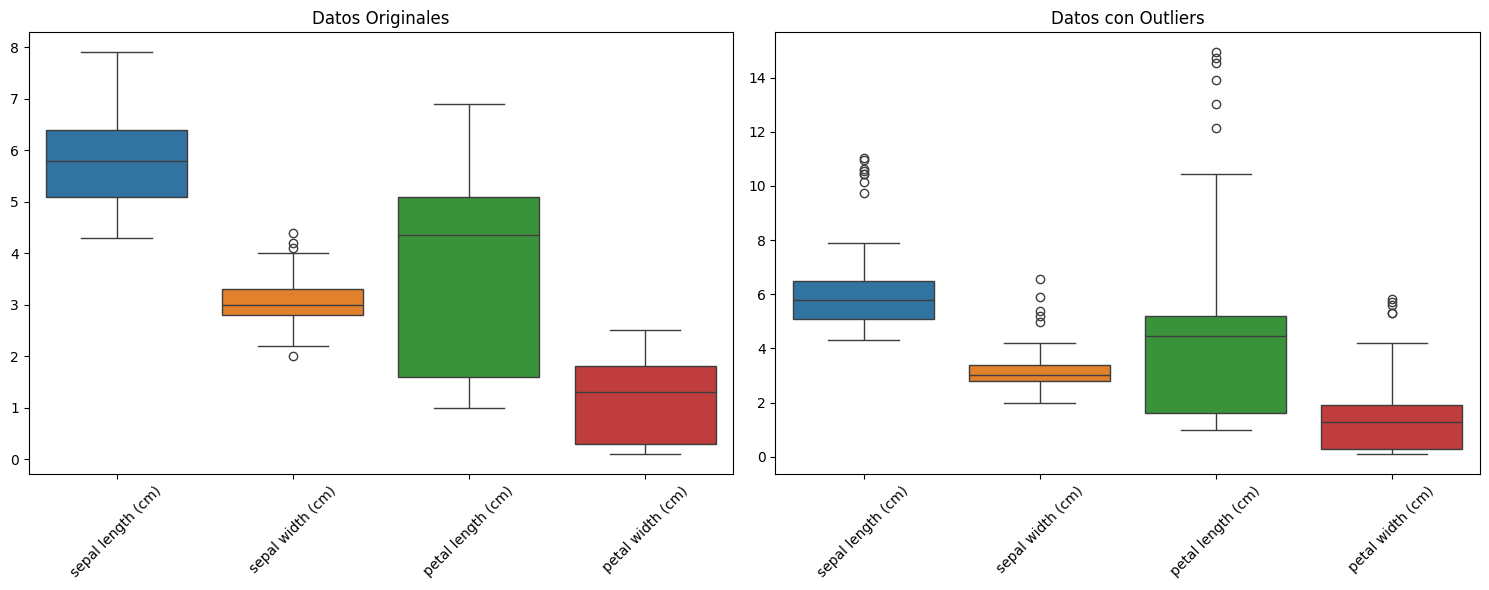

In [79]:
# Comprobamos visualmente los outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos originales
sns.boxplot(data=data_ini, ax=ax1)
ax1.set_title('Datos Originales')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Datos con outliers
sns.boxplot(data=data_outliers, ax=ax2)
ax2.set_title('Datos con Outliers')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

📊 DETECCIÓN DE OUTLIERS POR VARIABLE:

sepal length (cm):
  Rango normal: [3.00, 8.60]
  Outliers detectados: 8

sepal width (cm):
  Rango normal: [1.90, 4.30]
  Outliers detectados: 5

petal length (cm):
  Rango normal: [-3.80, 10.60]
  Outliers detectados: 6

petal width (cm):
  Rango normal: [-2.10, 4.30]
  Outliers detectados: 5

RESUMEN:
  Registros originales: 150
  Registros después de limpieza: 128
  Outliers eliminados: 22


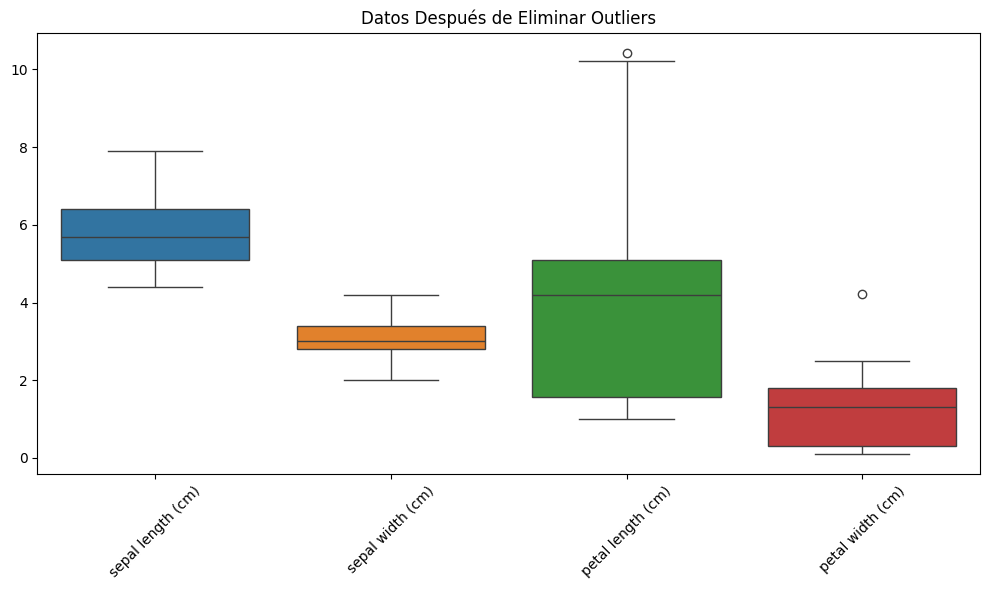

In [80]:

# Detección y eliminación de outliers usando método IQR
print("📊 DETECCIÓN DE OUTLIERS POR VARIABLE:")

# Aplicar detección de outliers a todas las columnas
data_clean = data_outliers.copy()

for col in data_outliers.select_dtypes(include=[np.number]).columns:
   # Calcular cuartiles y rango intercuartílico
   Q1 = data_outliers[col].quantile(0.25)
   Q3 = data_outliers[col].quantile(0.75)
   IQR = Q3 - Q1

   # Definir límites para outliers
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   # Identificar outliers
   outliers = data_outliers[(data_outliers[col] < lower_bound) | (data_outliers[col] > upper_bound)]

   print(f"\n{col}:")
   print(f"  Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
   print(f"  Outliers detectados: {len(outliers)}")

   # Eliminar outliers
   data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]

print(f"\nRESUMEN:")
print(f"  Registros originales: {len(data_outliers)}")
print(f"  Registros después de limpieza: {len(data_clean)}")
print(f"  Outliers eliminados: {len(data_outliers) - len(data_clean)}")

# Comprobamos visualmente el resultado
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean)
plt.title('Datos Después de Eliminar Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# 🏥 EJERCICIOS: Detección de outliers clínicos
# Descomenta y practica:

# Ejemplo 1: Detección de outliers con criterios médicos
# def detectar_outliers_medicos(df, columna, limite_inferior_clinico, limite_superior_clinico):
#     outliers_estadisticos = detectar_outliers_iqr(df, columna)
#     outliers_clinicos = df[(df[columna] < limite_inferior_clinico) | (df[columna] > limite_superior_clinico)]
#     print(f"Outliers estadísticos: {len(outliers_estadisticos)}")
#     print(f"Outliers clínicos: {len(outliers_clinicos)}")
#     return outliers_estadisticos, outliers_clinicos

# Ejemplo 2: Visualización comparativa antes/después
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# variables = data_outliers.select_dtypes(include=[np.number]).columns[:4]
# for i, var in enumerate(variables):
#     row, col = i//2, i%2
#     axes[row, col].hist(data_outliers[var], alpha=0.7, label='Con outliers')
#     axes[row, col].hist(data_clean[var], alpha=0.7, label='Sin outliers')
#     axes[row, col].set_title(f'Distribución de {var}')
#     axes[row, col].legend()

## Normalización

### StandardScaler
Estandarice las características eliminando la media y escalando a la varianza unitaria.

* [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [81]:
"""
Utilizaremos scikit-learn para aplicar la técnica de preprocesamiento StandardScaler.
El objetivo es transformar los datos para que tengan una media cero y una desviación
estándar unitaria. Esto es crucial en análisis médico para variables con diferentes escalas.
"""
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Cargamos métodos de preprocesado relevantes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Usaremos el rescalador estándar de Scikit-learn
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales
scaler.fit(data.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "data_norm"
data_norm = scaler.transform(data.values)

# Convertir a DataFrame para mejor visualización
data_norm_df = pd.DataFrame(data_norm, columns=data.columns)

# Comprobamos el resultado
console.print("Datos iniciales:\n", data.head())
console.print("Datos rescalados:\n", data_norm_df.head())

# Verificar que la normalización es correcta
print(f"\nVerificación de normalización:")
print(f"Medias después de normalización: {data_norm_df.mean().round(3).tolist()}")
print(f"Desviaciones estándar después de normalización: {data_norm_df.std().round(3).tolist()}")


Datos iniciales:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Datos rescalados:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Verificación de normalización:
Medias después de normalización: [-0.0, -0.0, -0.0, -0.0]
Desviaciones estándar después de normalización: [1.003, 1.003, 1.003, 1.003]


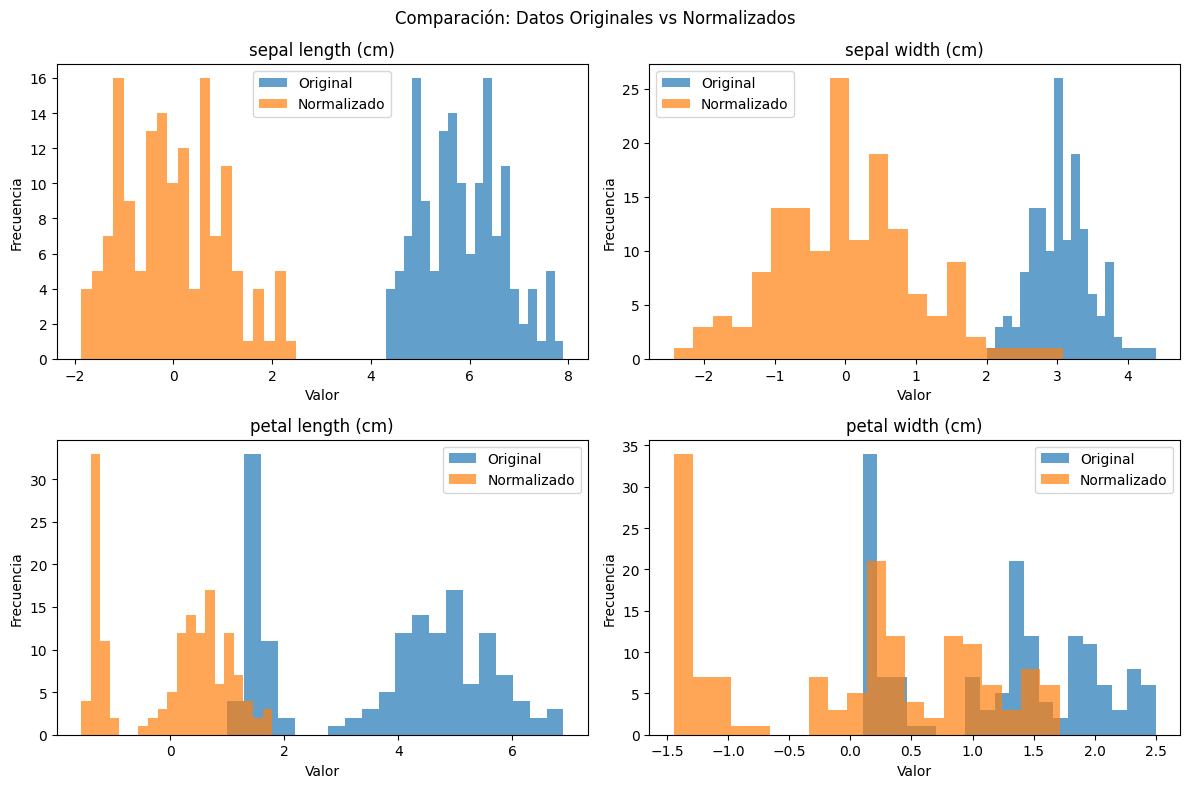

In [83]:
# Comparación visual antes y después
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
variables = data.columns[:4]

for i, var in enumerate(variables):
   row, col = i//2, i%2
   axes[row, col].hist(data[var], alpha=0.7, label='Original', bins=20)
   axes[row, col].hist(data_norm_df[var], alpha=0.7, label='Normalizado', bins=20)
   axes[row, col].set_title(f'{var}')
   axes[row, col].legend()
   axes[row, col].set_xlabel('Valor')
   axes[row, col].set_ylabel('Frecuencia')

plt.suptitle('Comparación: Datos Originales vs Normalizados')
plt.tight_layout()
plt.show()

In [82]:

# 🏥 EJERCICIOS: Normalización de variables clínicas
# Descomenta y practica:

# Ejemplo 1: Normalización de variables médicas con diferentes escalas
# datos_medicos = pd.DataFrame({
#     'edad': [25, 45, 65, 80, 35],
#     'presion_sistolica': [120, 140, 160, 180, 130],
#     'colesterol': [150, 200, 250, 300, 180],
#     'glucosa': [80, 100, 120, 140, 95]
# })
# scaler_medico = StandardScaler()
# datos_norm_medicos = scaler_medico.fit_transform(datos_medicos)
# print("Variables médicas normalizadas:")
# print(pd.DataFrame(datos_norm_medicos, columns=datos_medicos.columns))

# Ejemplo 2: Comparar StandardScaler vs MinMaxScaler
# scaler_minmax = MinMaxScaler()
# data_minmax = scaler_minmax.fit_transform(data.values)
# print("Comparación de escaladores:")
# print(f"StandardScaler - Rango: [{data_norm.min():.2f}, {data_norm.max():.2f}]")
# print(f"MinMaxScaler - Rango: [{data_minmax.min():.2f}, {data_minmax.max():.2f}]")

In [88]:
# Veamos un ejemplo con datos más fáciles de interpretar
# Simulamos variables médicas con diferentes escalas típicas

# Creamos un DataFrame de ejemplo con escalas médicas realistas
data = {
   'Edad': [25, 35, 45, 55, 65],                    # Años (20-80)
   'Presion_Sistolica': [110, 120, 130, 140, 150], # mmHg (90-180)
   'Colesterol': [150, 200, 250, 300, 350]         # mg/dL (100-400)
}
df = pd.DataFrame(data)

# Mostramos el DataFrame original
print("DataFrame de Variables Médicas:\n", df)
print(f"\nEstadísticas originales:")
print(df.describe())

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales
scaler.fit(df.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales
X_scaled = scaler.transform(df.values)

# Mostramos el DataFrame transformado
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
print("\nDataFrame Escalado (Normalizado):\n", df_scaled)

# Verificamos la normalización
print(f"\nVerificación de normalización:")
print(f"Medias (deben ser ~0): {df_scaled.mean().round(3).tolist()}")
print(f"Desviaciones estándar (deben ser ~1): {df_scaled.std().round(3).tolist()}")

DataFrame de Variables Médicas:
    Edad  Presion_Sistolica  Colesterol
0    25                110         150
1    35                120         200
2    45                130         250
3    55                140         300
4    65                150         350

Estadísticas originales:
            Edad  Presion_Sistolica  Colesterol
count   5.000000           5.000000    5.000000
mean   45.000000         130.000000  250.000000
std    15.811388          15.811388   79.056942
min    25.000000         110.000000  150.000000
25%    35.000000         120.000000  200.000000
50%    45.000000         130.000000  250.000000
75%    55.000000         140.000000  300.000000
max    65.000000         150.000000  350.000000

DataFrame Escalado (Normalizado):
        Edad  Presion_Sistolica  Colesterol
0 -1.414214          -1.414214   -1.414214
1 -0.707107          -0.707107   -0.707107
2  0.000000           0.000000    0.000000
3  0.707107           0.707107    0.707107
4  1.414214           1.

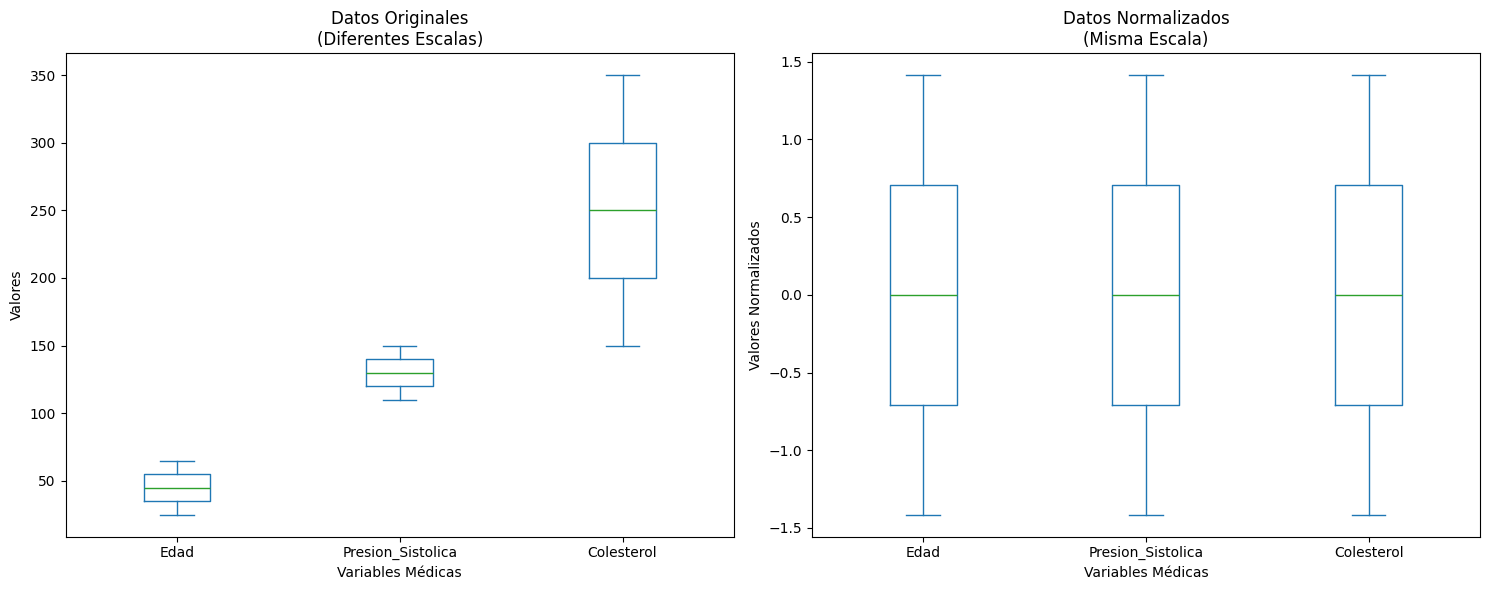

In [89]:
# Comparación visual de las escalas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos originales
df.plot(kind='box', ax=ax1, title='Datos Originales\n(Diferentes Escalas)')
ax1.set_ylabel('Valores')
ax1.set_xlabel('Variables Médicas')

# Datos normalizados
df_scaled.plot(kind='box', ax=ax2, title='Datos Normalizados\n(Misma Escala)')
ax2.set_ylabel('Valores Normalizados')
ax2.set_xlabel('Variables Médicas')

plt.tight_layout()
plt.show()

In [84]:
# 🏥 EJERCICIOS: Interpretación de normalización
# Descomenta y practica:

# Ejemplo 1: Mostrar transformación paso a paso
# print("Transformación paso a paso:")
# for col in df.columns:
#     media = df[col].mean()
#     std = df[col].std()
#     print(f"\n{col}:")
#     print(f"  Media original: {media:.2f}")
#     print(f"  Std original: {std:.2f}")
#     print(f"  Fórmula: (valor - {media:.2f}) / {std:.2f}")

# Ejemplo 2: Comparar un paciente antes y después
# paciente_ejemplo = df.iloc[2]  # Paciente del medio
# paciente_normalizado = df_scaled.iloc[2]
# print(f"\nPaciente ejemplo:")
# print(f"Original: {paciente_ejemplo.tolist()}")
# print(f"Normalizado: {paciente_normalizado.round(3).tolist()}")

# Ejemplo 3: Aplicar a nuevos datos
# nuevo_paciente = pd.DataFrame({
#     'Edad': [40],
#     'Presion_Sistolica': [125],
#     'Colesterol': [220]
# })
# nuevo_paciente_norm = scaler.transform(nuevo_paciente.values)
# print(f"Nuevo paciente normalizado: {nuevo_paciente_norm[0].round(3)}")

### MinMaxScaler
Transforma las características escalándolas a un intervalo determinado.
Este estimador escala y traduce cada característica individualmente de forma que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.

* [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

 => Datos NO rescalados: 
    sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
 => Datos rescalados: 
    sepal length (cm)  sepal width (cm)
0           0.222222          0.625000
1           0.166667          0.416667
2           0.111111          0.500000
3           0.083333          0.458333
4           0.194444          0.666667

Verificación de rangos:
Datos originales:
  sepal length (cm): [4.300, 7.900]
  sepal width (cm): [2.000, 4.400]

Datos rescalados:
  sepal length (cm): [0.000, 1.000]
  sepal width (cm): [0.000, 1.000]


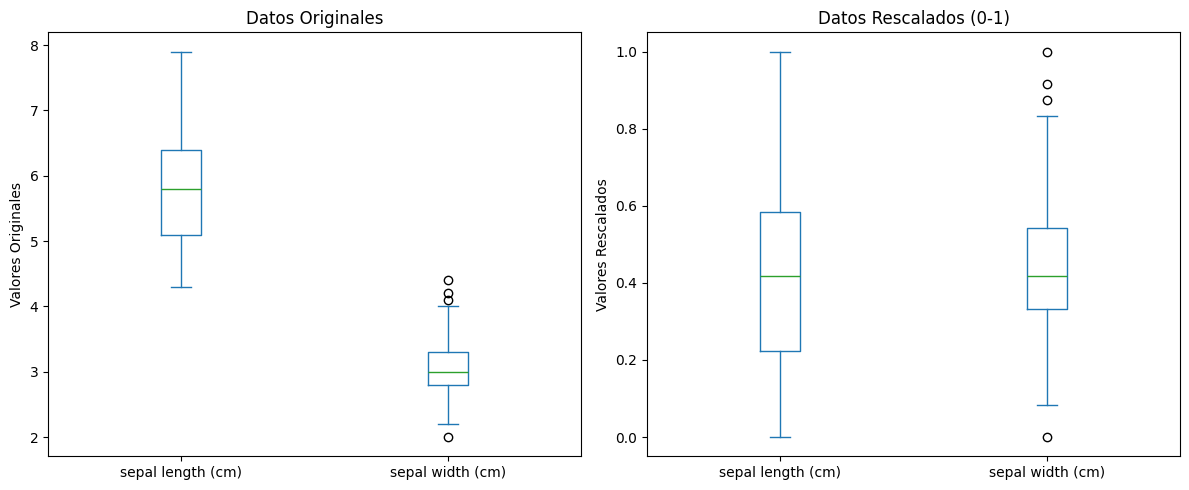

In [91]:
# Volvemos a cargar los datos de partida para obviar transformaciones previas (solo con fines demostrativos)
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Creamos el MinMaxScaler
# feature_range=(0, 1) normaliza los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionamos columnas con valores numéricos de interés
columns_to_scale = ['sepal length (cm)', 'sepal width (cm)']
data_s = data[columns_to_scale]

# Imprimimos los datos originales
print(" => Datos NO rescalados: \n", data_s.head())

# Aplicamos la función de scaling
data_scaled = pd.DataFrame(scaler.fit_transform(data_s), columns=columns_to_scale)

# Imprimimos los datos rescalados
print(" => Datos rescalados: \n", data_scaled.head())

# Verificamos los rangos de transformación
print(f"\nVerificación de rangos:")
print(f"Datos originales:")
for col in columns_to_scale:
   print(f"  {col}: [{data_s[col].min():.3f}, {data_s[col].max():.3f}]")

print(f"\nDatos rescalados:")
for col in columns_to_scale:
   print(f"  {col}: [{data_scaled[col].min():.3f}, {data_scaled[col].max():.3f}]")

# Comparación visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Datos originales
data_s.plot(kind='box', ax=ax1, title='Datos Originales')
ax1.set_ylabel('Valores Originales')

# Datos rescalados
data_scaled.plot(kind='box', ax=ax2, title='Datos Rescalados (0-1)')
ax2.set_ylabel('Valores Rescalados')

plt.tight_layout()
plt.show()

In [90]:

# 🏥 EJERCICIOS: MinMaxScaler en datos clínicos
# Descomenta y practica:

# Ejemplo 1: Rescalar variables médicas a diferentes rangos
# datos_medicos = pd.DataFrame({
#     'presion_sistolica': [90, 120, 140, 160, 180],
#     'frecuencia_cardiaca': [60, 70, 80, 90, 100]
# })
# scaler_medico = MinMaxScaler(feature_range=(0, 10))  # Escala 0-10
# datos_rescalados = scaler_medico.fit_transform(datos_medicos)
# print("Variables médicas rescaladas 0-10:")
# print(pd.DataFrame(datos_rescalados, columns=datos_medicos.columns))

# Ejemplo 2: Comparar StandardScaler vs MinMaxScaler
# scaler_standard = StandardScaler()
# scaler_minmax = MinMaxScaler()
# data_standard = scaler_standard.fit_transform(data_s)
# data_minmax = scaler_minmax.fit_transform(data_s)
# print("Comparación de escaladores:")
# print(f"StandardScaler - Media: {data_standard.mean():.3f}, Std: {data_standard.std():.3f}")
# print(f"MinMaxScaler - Min: {data_minmax.min():.3f}, Max: {data_minmax.max():.3f}")

# Ejemplo 3: Aplicar a nuevos datos médicos
# nuevo_paciente = [[5.5, 3.2]]  # Nuevas medidas
# nuevo_rescalado = scaler.transform(nuevo_paciente)
# print(f"Nuevo paciente rescalado: {nuevo_rescalado[0]}")

Estadísticas de transformaciones:

Datos originales:
  Media: [5.843, 3.057]
  Std: [0.828, 0.436]

Datos rescalados (0-1):
  Media: [0.429, 0.441]
  Std: [0.23, 0.182]

Datos normalizados (Z-score):
  Media: [-0.0, 0.0]
  Std: [1.0, 1.0]


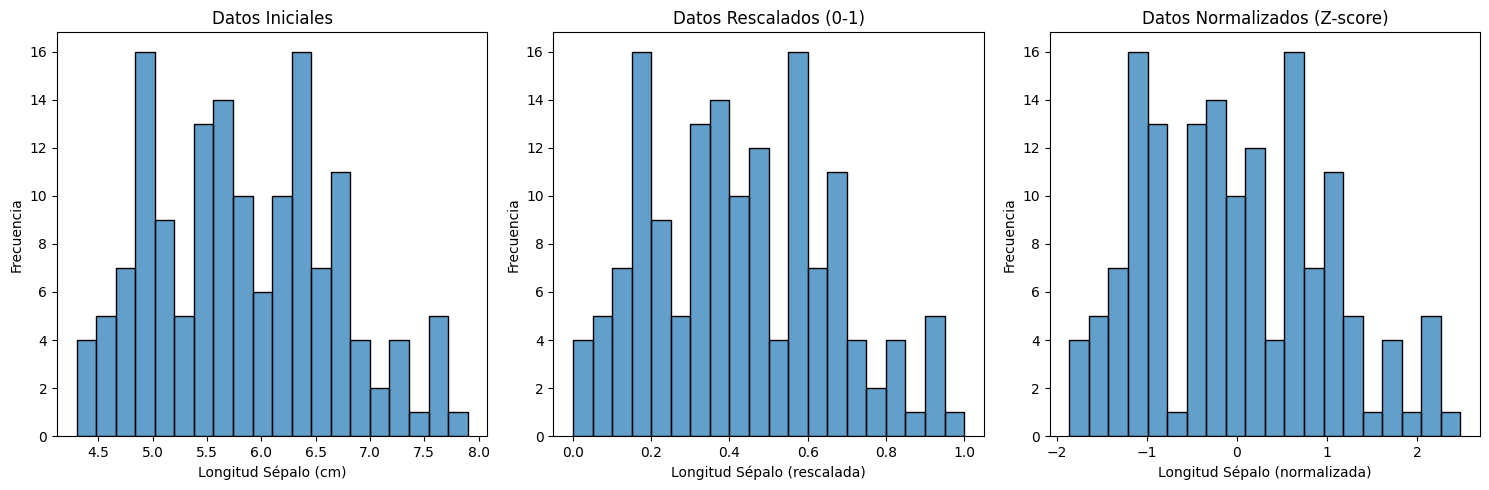


Comparación de rangos:
Originales: [4.30, 7.90]
Rescalados: [0.00, 1.00]
Normalizados: [-1.86, 2.48]


In [92]:
# Normalización estándar de los datos, también conocida como escala Z o estandarización Z
# Aplicamos normalización Z a los datos ya rescalados (media=0, std=1)
data_norm = (data_scaled - data_scaled.mean()) / data_scaled.std()

# Verificamos las estadísticas de cada transformación
print("Estadísticas de transformaciones:")
print(f"\nDatos originales:")
print(f"  Media: {data_s.mean().round(3).tolist()}")
print(f"  Std: {data_s.std().round(3).tolist()}")

print(f"\nDatos rescalados (0-1):")
print(f"  Media: {data_scaled.mean().round(3).tolist()}")
print(f"  Std: {data_scaled.std().round(3).tolist()}")

print(f"\nDatos normalizados (Z-score):")
print(f"  Media: {data_norm.mean().round(3).tolist()}")
print(f"  Std: {data_norm.std().round(3).tolist()}")

### Visualización de los datos
fig = plt.figure(figsize=(15, 5))

# Datos originales
plt.subplot(131)
sns.histplot(data['sepal length (cm)'].values, bins=20, alpha=0.7)
plt.title("Datos Iniciales")
plt.xlabel("Longitud Sépalo (cm)")
plt.ylabel("Frecuencia")

# Datos rescalados
plt.subplot(132)
sns.histplot(data_scaled['sepal length (cm)'].values, bins=20, alpha=0.7)
plt.title("Datos Rescalados (0-1)")
plt.xlabel("Longitud Sépalo (rescalada)")
plt.ylabel("Frecuencia")

# Datos normalizados
plt.subplot(133)
sns.histplot(data_norm['sepal length (cm)'].values, bins=20, alpha=0.7)
plt.title("Datos Normalizados (Z-score)")
plt.xlabel("Longitud Sépalo (normalizada)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Comparación de rangos
print(f"\nComparación de rangos:")
print(f"Originales: [{data['sepal length (cm)'].min():.2f}, {data['sepal length (cm)'].max():.2f}]")
print(f"Rescalados: [{data_scaled['sepal length (cm)'].min():.2f}, {data_scaled['sepal length (cm)'].max():.2f}]")
print(f"Normalizados: [{data_norm['sepal length (cm)'].min():.2f}, {data_norm['sepal length (cm)'].max():.2f}]")

In [93]:

# 🏥 EJERCICIOS: Transformaciones de datos clínicos
# Descomenta y practica:

# Ejemplo 1: Comparar las tres transformaciones para variables médicas
# presion_original = [90, 120, 140, 160, 180]
# presion_rescalada = (presion_original - np.min(presion_original)) / (np.max(presion_original) - np.min(presion_original))
# presion_normalizada = (presion_original - np.mean(presion_original)) / np.std(presion_original)
# print("Transformaciones de presión arterial:")
# print(f"Original: {presion_original}")
# print(f"Rescalada (0-1): {np.array(presion_rescalada).round(3)}")
# print(f"Normalizada (Z): {np.array(presion_normalizada).round(3)}")

# Ejemplo 2: Visualizar distribuciones superpuestas
# plt.figure(figsize=(10, 6))
# plt.hist(data['sepal length (cm)'], alpha=0.5, label='Original', bins=20)
# plt.hist(data_scaled['sepal length (cm)'], alpha=0.5, label='Rescalado', bins=20)
# plt.hist(data_norm['sepal length (cm)'], alpha=0.5, label='Normalizado', bins=20)
# plt.legend()
# plt.title('Comparación de Distribuciones')
# plt.xlabel('Valores')
# plt.ylabel('Frecuencia')

# NOTA

Los siguiente ejemplos son complementarios a los ejercicios vistos en la semana previa:
* Enlaces a los cuadernos respectivos:
  * [Cuaderno 1](https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Preprocesado_y_estructuracion_de_datos.ipynb)
  * [Cuaderno 2](https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Extraccion_de_caracteristicas.ipynb#scrollTo=y8u270f2nEm-)


## Codificación de variables categóricas
La mayoría de los algoritmos de Machine Learning requieren que todas las variables sean numéricas. Por lo tanto, las variables categóricas deben ser codificadas en una forma numérica antes de entrar al modelo durante el proceso de entrenamiento (y/o inferencia).

In [95]:
# Creamos un DataFrame de ejemplo con variables categóricas médicas
data = {
   'Diagnostico': ['Hipertensión', 'Diabetes', 'Normal', 'Diabetes', 'Hipertensión'],
   'Sexo': ['M', 'F', 'M', 'F', 'M'],
   'Grupo_Sanguineo': ['A', 'B', 'O', 'AB', 'A']
}
df = pd.DataFrame(data)

# Mostramos el DataFrame original
print("DataFrame Original (Variables Médicas):\n", df)

# Codificación con OneHotEncoder usando get_dummies de pandas
# Creamos variables dummy para las variables categóricas
df_encoded = pd.get_dummies(df, columns=['Diagnostico', 'Sexo'], prefix=['Diagnostico', 'Sexo'])

# Mostramos el DataFrame con las variables codificadas
print("\nDataFrame con Variables Codificadas (One-Hot):\n", df_encoded)

# Codificación numérica con factorize de pandas
# Codificamos la variable categórica 'Diagnostico' numéricamente
df['Diagnostico_codificado'], diagnostico_labels = pd.factorize(df['Diagnostico'])

# También codificamos grupo sanguíneo
df['Grupo_Sanguineo_cod'], grupo_labels = pd.factorize(df['Grupo_Sanguineo'])

# Mostramos el DataFrame con variables codificadas numéricamente
print("\nDataFrame con Variables Codificadas Numéricamente:\n", df)

# Mostrar la correspondencia de códigos
print(f"\nCorrespondencia de códigos:")
print(f"Diagnóstico: {dict(enumerate(diagnostico_labels))}")
print(f"Grupo Sanguíneo: {dict(enumerate(grupo_labels))}")

# Comparación de métodos
print(f"\nComparación de métodos de codificación:")
print(f"Original: {df.shape[1]} columnas")
print(f"One-Hot Encoding: {df_encoded.shape[1]} columnas")
print(f"Codificación numérica: {df.shape[1]} columnas")

DataFrame Original (Variables Médicas):
     Diagnostico Sexo Grupo_Sanguineo
0  Hipertensión    M               A
1      Diabetes    F               B
2        Normal    M               O
3      Diabetes    F              AB
4  Hipertensión    M               A

DataFrame con Variables Codificadas (One-Hot):
   Grupo_Sanguineo  Diagnostico_Diabetes  Diagnostico_Hipertensión  \
0               A                 False                      True   
1               B                  True                     False   
2               O                 False                     False   
3              AB                  True                     False   
4               A                 False                      True   

   Diagnostico_Normal  Sexo_F  Sexo_M  
0               False   False    True  
1               False    True   False  
2                True   False    True  
3               False    True   False  
4               False   False    True  

DataFrame con Variables Codifica

In [94]:
# 🏥 EJERCICIOS: Codificación de variables clínicas
# Descomenta y practica:

# Ejemplo 1: Codificar variables médicas con sklearn
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()
# df['Sexo_encoded'] = le.fit_transform(df['Sexo'])
# print("Codificación con LabelEncoder:")
# print(df[['Sexo', 'Sexo_encoded']])

# Ejemplo 2: Codificar variables ordinales médicas
# severidad = ['Leve', 'Moderado', 'Severo', 'Crítico']
# df_severidad = pd.DataFrame({'Severidad': ['Leve', 'Severo', 'Moderado', 'Crítico', 'Leve']})
# df_severidad['Severidad_ord'] = df_severidad['Severidad'].map({
#     'Leve': 1, 'Moderado': 2, 'Severo': 3, 'Crítico': 4
# })
# print("Codificación ordinal:")
# print(df_severidad)

# Ejemplo 3: Tratar con categorías faltantes
# df_con_faltantes = df.copy()
# df_con_faltantes.loc[0, 'Diagnostico'] = np.nan
# df_dummy_faltantes = pd.get_dummies(df_con_faltantes, dummy_na=True)
# print("One-hot con valores faltantes:")
# print(df_dummy_faltantes.head())


---

# Reducción de la dimensionalidad (Extracción de características)

### Análisis de la componente principal (PCA)
El análisis de la componente principal, o PCA por sus siglas en inglés, es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos. PCA nos permite simplificar la información presente en un conjunto de datos con múltiples variables y transformarla en un conjunto de datos reducido, pero que todavía retiene gran parte de la información original.

El objetivo del PCA es encontrar una representación de los datos que sea más fácil de entender y que conserve la mayor cantidad posible de la varianza en los datos.

Para llevar a cabo un análisis PCA primero se calcula la matriz de covarianza de los datos originales. A continuación, se calculan los vectores propios de esta matriz, que nos indican las direcciones en las que los datos tienen la mayor varianza. Luego, se proyectan los datos originales en estas direcciones y se obtiene un nuevo conjunto de datos con menos variables que aún captura gran parte de la información original.


In [101]:
console.rule("[blue] Análisis de la componente principal [/blue]")
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA

# Cargaremos en este caso los siguientes datos
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
console.log(df.describe())

──────────────────────────────────────  Análisis de la componente principal  ──────────────────────────────────────

[16:22:48]        mean radius  mean texture  mean perimeter    mean area  \       ]8;id=342662;file:///tmp/ipython-input-101-2751396995.py\ipython-input-101-2751396995.py]8;;\:]8;id=155830;file:///tmp/ipython-input-101-2751396995.py#9\9]8;;\
           count   569.000000    569.000000      569.000000   569.000000                                           
           mean     14.127292     19.289649       91.969033   654.889104                                           
           std       3.524049      4.301036       24.298981   351.914129                                           
           min       6.981000      9.710000       43.790000   143.500000                                           
           25%      11.700000     16.170000       75.170000   420.300000                                           
           50%      13.370000     18.840000       86.240000   551.100000                                           
           75%      15.780000     21.800000      104.100000   782.700000                                           
           max      28.110000     39.280000      188.500000  2501.000000                                           
                                                                                                                   
                  mean smoothness  mean compactness  mean concavity  mean concave                                  
           points  \                                                                                               
           count       569.000000        569.000000      569.000000                                                
           569.000000                                                                                              
           mean          0.096360          0.104341        0.088799                                                
           0.048919                                                                                                
           std           0.014064          0.052813        0.079720                                                
           0.038803                                                                                                
           min           0.052630          0.019380        0.000000                                                
           0.000000                                                                                                
           25%           0.086370          0.064920        0.029560                                                
           0.020310                                                                                                
           50%           0.095870          0.092630        0.061540                                                
           0.033500                                                                                                
           75%           0.105300          0.130400        0.130700                                                
           0.074000                                                                                                
           max           0.163400          0.345400        0.426800                                                
           0.201200                                                                                                
                                                                                                                   
                  mean symmetry  mean fractal dimension  ...  worst radius  \                                      
           count     569.000000              569.000000  ...    569.000000                                         
           mean        0.181162                0.062798  ...     16.269190                                         
           std         0.027414                0.007060  ...      4.833242                                         
           min         0.106000       

In [103]:
# Estandarizamos los datos
scaler = StandardScaler()
scaler.fit(df.values)
data_scaled = scaler.transform(df.values)

console.log("Número de características:", data_scaled.shape[1])

# Para evaluar los resultados, utilizaremos el conjunto completo de variables
# "n_components" = 30 especifica que el PCA se ha de ajustar a los datos para encontrar
# las 30 componentes principales.
pca = PCA(n_components=30, random_state=2020)
pca.fit(data_scaled)

# Almacenamos en la variable X_pca los valores de los (30) componentes principales
X_pca = pca.transform(data_scaled)
print("X_pca:\n", X_pca)

# Puesto que seleccionamos el conjunto completo de variables las componenete
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
print("\n => Varianza explicada por las componentes:", sum(pca.explained_variance_ratio_ * 100))

# Análisis de componentes principales
print(f"\nAnálisis de componentes principales:")
print(f"Primeras 5 componentes explican: {sum(pca.explained_variance_ratio_[:5]) * 100:.2f}%")
print(f"Primeras 10 componentes explican: {sum(pca.explained_variance_ratio_[:10]) * 100:.2f}%")

[16:24:08] Número de características: 30                                          ]8;id=152081;file:///tmp/ipython-input-103-2985201441.py\ipython-input-103-2985201441.py]8;;\:]8;id=97083;file:///tmp/ipython-input-103-2985201441.py#6\6]8;;\

X_pca:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ...  3.39144536e-02
  -4.56477199e-02  4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ... -3.26241827e-02
   5.68742432e-03  1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ... -4.70258247e-02
  -3.14589659e-03 -7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ...  2.57775589e-03
  -6.70621179e-03 -3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ...  6.80863833e-02
   8.41632764e-02  2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ...  9.51587894e-03
   6.09131090e-02  1.94755854e-02]]

 => Varianza explicada por las componentes: 100.00000000000003

Análisis de componentes principales:
Primeras 5 componentes explican: 84.73%
Primeras 10 componentes explican: 95.16%


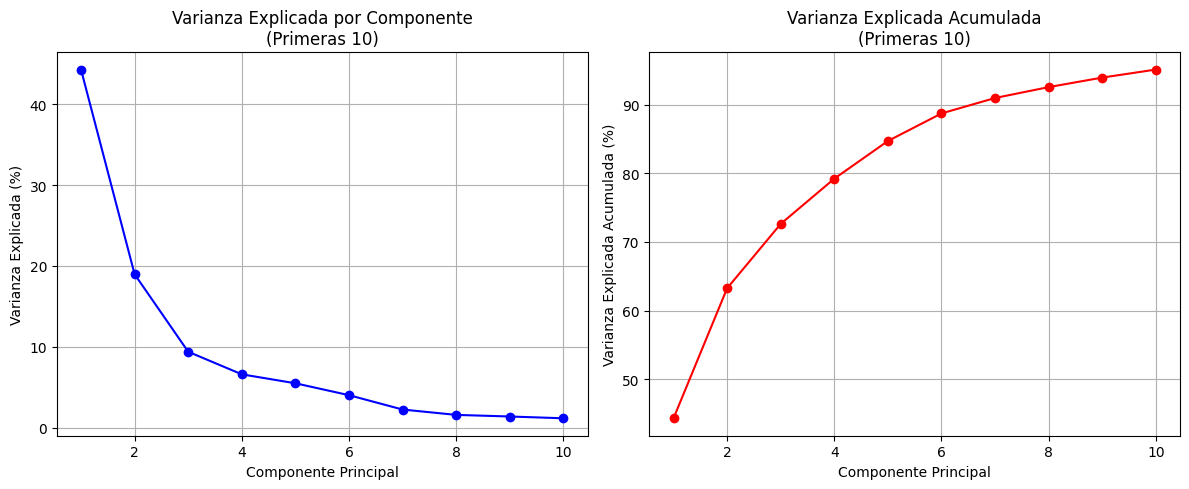

In [104]:
# Visualización de la varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10] * 100, 'bo-')
plt.title('Varianza Explicada por Componente\n(Primeras 10)')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_[:10]) * 100, 'ro-')
plt.title('Varianza Explicada Acumulada\n(Primeras 10)')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [107]:
# 🔬 EJERCICIOS MÉDICOS: Análisis de componentes principales
# Descomenta y practica:

# Ejemplo 1: Encontrar el número óptimo de componentes (90% varianza)
# varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
# n_componentes_90 = np.argmax(varianza_acumulada >= 0.9) + 1
# print(f"Componentes para 90% varianza: {n_componentes_90}")

# Ejemplo 2: PCA con pocas componentes para visualización
# pca_2d = PCA(n_components=2, random_state=2020)
# X_pca_2d = pca_2d.fit_transform(data_scaled)
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cancer_data.target, cmap='viridis')
# plt.xlabel('Primera Componente Principal')
# plt.ylabel('Segunda Componente Principal')
# plt.title('Visualización 2D de Datos de Cáncer de Mama')
# plt.colorbar(scatter)

# Ejemplo 3: Interpretar componentes principales
# componentes_importantes = pca.components_[:3]  # Primeras 3 componentes
# variables_importantes = []
# for i, comp in enumerate(componentes_importantes):
#     idx_max = np.argmax(np.abs(comp))
#     variables_importantes.append(cancer_data.feature_names[idx_max])
# print(f"Variables más importantes por componente: {variables_importantes}")

Este código genera dos gráficos para entender cuánta información (varianza) de los datos originales es capturada por las primeras componentes principales obtenidas del PCA:

* Gráfico de la izquierda (Varianza Explicada por Componente):

Muestra cuánto de la varianza total de los datos es explicado por cada una de las primeras 10 componentes principales individualmente.
Puedes ver cómo la importancia de cada componente disminuye a medida que te mueves de la PC1 (la más importante) a la PC10.
Ayuda a identificar cuántas componentes son significativamente importantes.

* Gráfico de la derecha (Varianza Explicada Acumulada):

Muestra la suma acumulada de la varianza explicada por las componentes principales.
Te permite ver cuánta varianza total se explica al incluir un cierto número de componentes. Por ejemplo, puedes ver cuánta varianza se explica con las primeras 5 componentes, las primeras 10, etc.

Es útil para decidir cuántas componentes principales conservar para reducir la dimensionalidad mientras se retiene una cantidad aceptable de información.

🔍 ANÁLISIS PCA OPTIMIZADO:
Componentes necesarias para 95% varianza: 10
Reducción dimensional: 30 → 10 variables
Varianza explicada real: 95.16%


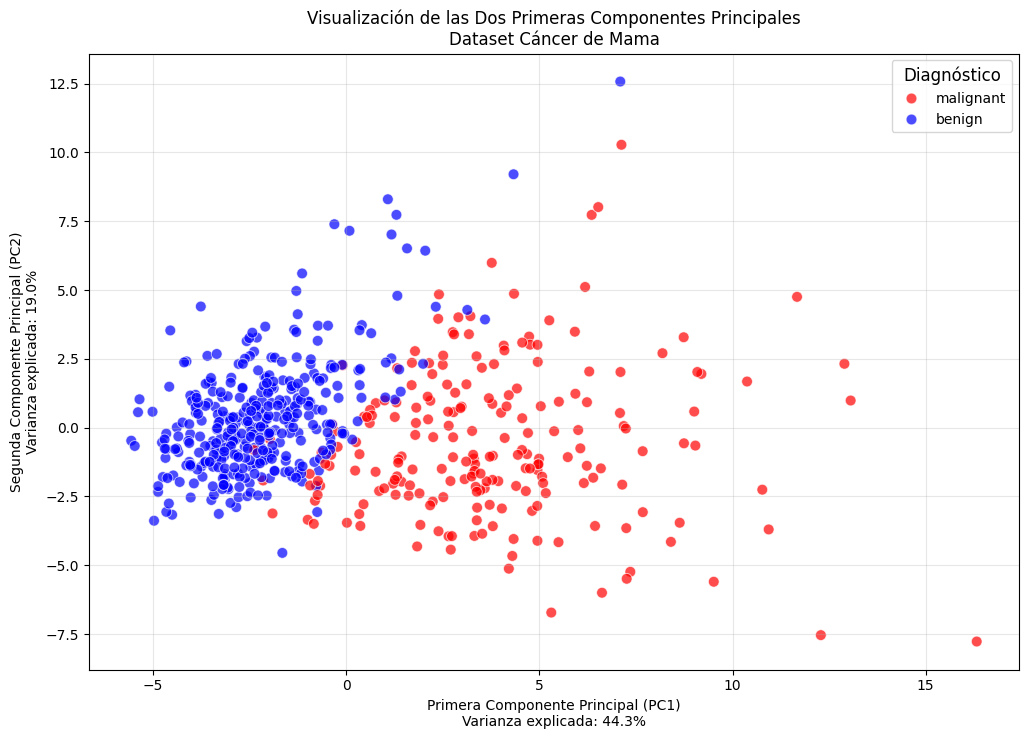


📊 ANÁLISIS DE SEPARABILIDAD:
Casos malignos: 212 (37.3%)
Casos benignos: 357 (62.7%)

Estadísticas PC1:
  Malignos - Media: 3.71, Std: 3.03
  Benignos - Media: -2.21, Std: 1.64


In [105]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la varianza
# del siguiente modo - Esto es más eficiente para análisis médico

# Ajustar PCA para conservar el 95% de la varianza
# Esto automáticamente selecciona el número mínimo de componentes necesarias
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(data_scaled)
X_pca_95 = pca_95.transform(data_scaled)

print(f"🔍 ANÁLISIS PCA OPTIMIZADO:")
print(f"Componentes necesarias para 95% varianza: {pca_95.n_components_}")
print(f"Reducción dimensional: {df.shape[1]} → {pca_95.n_components_} variables")
print(f"Varianza explicada real: {sum(pca_95.explained_variance_ratio_) * 100:.2f}%")

# Convertir las dos primeras componentes principales en un DataFrame para una mejor visualización
pca_df = pd.DataFrame(X_pca_95[:, :2], columns=['PC1', 'PC2'])

# Añadir las etiquetas de diagnóstico (0=maligno, 1=benigno)
pca_df['Diagnostico'] = cancer_data.target
pca_df['Diagnostico_Label'] = [cancer_data.target_names[i] for i in cancer_data.target]

# Visualizar la relación de las dos primeras componentes principales con un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnostico_Label',
               palette=['red', 'blue'], alpha=0.7, s=60)
plt.title('Visualización de las Dos Primeras Componentes Principales\nDataset Cáncer de Mama')
plt.xlabel(f'Primera Componente Principal (PC1)\nVarianza explicada: {pca_95.explained_variance_ratio_[0]*100:.1f}%')
plt.ylabel(f'Segunda Componente Principal (PC2)\nVarianza explicada: {pca_95.explained_variance_ratio_[1]*100:.1f}%')
plt.legend(title='Diagnóstico', title_fontsize=12, fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Análisis adicional de separabilidad
print(f"\n📊 ANÁLISIS DE SEPARABILIDAD:")
malignos = pca_df[pca_df['Diagnostico'] == 0]
benignos = pca_df[pca_df['Diagnostico'] == 1]
print(f"Casos malignos: {len(malignos)} ({len(malignos)/len(pca_df)*100:.1f}%)")
print(f"Casos benignos: {len(benignos)} ({len(benignos)/len(pca_df)*100:.1f}%)")

# Estadísticas por grupo en las primeras componentes
print(f"\nEstadísticas PC1:")
print(f"  Malignos - Media: {malignos['PC1'].mean():.2f}, Std: {malignos['PC1'].std():.2f}")
print(f"  Benignos - Media: {benignos['PC1'].mean():.2f}, Std: {benignos['PC1'].std():.2f}")


In [106]:
# 🏥 EJERCICIOS: Interpretación clínica de PCA
# Descomenta y practica:

# Ejemplo 1: Crear gráfico de densidad para mejor separación visual
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# for i, (ax, pc) in enumerate(zip(axes, ['PC1', 'PC2'])):
#     sns.histplot(data=pca_df, x=pc, hue='Diagnostico_Label',
#                  alpha=0.6, ax=ax, kde=True)
#     ax.set_title(f'Distribución {pc}')
#     ax.set_xlabel(f'{pc} (Varianza: {pca_95.explained_variance_ratio_[i]*100:.1f}%)')

# Ejemplo 2: Análisis de variables más influyentes
# componentes = pca_95.components_[:2]  # Primeras 2 componentes
# variables_influyentes = []
# for i, comp in enumerate(componentes):
#     indices_importantes = np.argsort(np.abs(comp))[-5:]  # Top 5 variables
#     vars_importantes = [cancer_data.feature_names[idx] for idx in indices_importantes]
#     variables_influyentes.append(vars_importantes)
#     print(f"PC{i+1} - Variables más influyentes: {vars_importantes}")

# Ejemplo 3: Evaluar calidad de la reducción dimensional
# from sklearn.metrics import silhouette_score
# score_original = silhouette_score(data_scaled, cancer_data.target)
# score_pca = silhouette_score(X_pca_95, cancer_data.target)
# print(f"\nCalidad de clustering:")
# print(f"  Datos originales: {score_original:.3f}")
# print(f"  Después de PCA: {score_pca:.3f}")

### Notas
El gráfico de dispersión generado a partir de las dos primeras componentes principales (PC1 y PC2) del PCA busca representar la estructura subyacente de los datos en un espacio de menor dimensión. Esto puede revelar información sobre las relaciones entre las observaciones y las diferencias entre las clases (en este caso, representadas por cancer_data.target).

* **Clusters Separados**: Si las observaciones de diferentes clases forman clusters distintos y claramente separados en el gráfico, esto indica que hay diferencias significativas entre las clases. Esto podría sugerir que las características originales contienen información valiosa para diferenciar las clases.

* **Sobrelapamiento de Clusters**: Si los clusters están sobrelapados pero todavía hay alguna separación, esto podría sugerir que hay alguna información en los datos para diferenciar las clases, pero no es tan clara. Puede haber características que contribuyan al ruido o la separación puede requerir más de dos dimensiones para ser claramente visible.

* **Ausencia de Clusters**: Si no hay una separación clara entre las clases y las observaciones están mezcladas, esto podría indicar que las características originales no son muy útiles para diferenciar las clases, al menos en las dos primeras componentes principales.


---

# Material adicional (ejemplo con datos de imagen cerebral)

---

## Análisis de Componentes Independientes (ICA)

In [67]:
# Utilizaremos datos de fMRI para nuestro ejemplo con ICA
# Para ello, comenzamos instalando la librería nilearn
!python -m pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 95.5 MB/s eta 0:00:00


In [68]:
from nilearn import datasets
# Descargamos un sujeto del estudio con RM funcional
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Preprocesado de la imagen
from nilearn.input_data import NiftiMasker

# Aplicamos una máscara para extraer el fondo de la imagen (vóxeles no cerebrales)
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(file_name)

[fetch_development_fmri] Added README.md to /root/nilearn_data

[fetch_development_fmri] Dataset created in /root/nilearn_data/development_fmri

[fetch_development_fmri] Added README.md to /root/nilearn_data/development_fmri

[fetch_development_fmri] Dataset created in /root/nilearn_data/development_fmri/development_fmri

[fetch_development_fmri] Downloading data from https://osf.io/yr3av/download ...

[fetch_development_fmri]  ...done. (1 seconds, 0 min)

[fetch_development_fmri] Dataset found in /root/nilearn_data/development_fmri/development_fmri

[fetch_development_fmri] Downloading data from https://osf.io/download/5c8ff3df4712b400183b7092/ ...

[fetch_development_fmri]  ...done. (1 seconds, 0 min)

[fetch_development_fmri] Downloading data from https://osf.io/download/5c8ff3e04712b400193b5bdf/ ...

[fetch_development_fmri]  ...done. (2 seconds, 0 min)

/tmp/ipython-input-68-3460183025.py:7: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiMasker


In [69]:
from sklearn.decomposition import FastICA
import numpy as np
# Seleccionamos 10 componentes
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T
# Aplicamos un corte (80% señal) en los datos después de normalizar según
# la media y desviación estándar de los datos
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0
# Invertimos la transformación para recuperar la estructura 3D
component_img = masker.inverse_transform(components_masked)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


/tmp/ipython-input-70-1075612776.py:4: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(file_name)


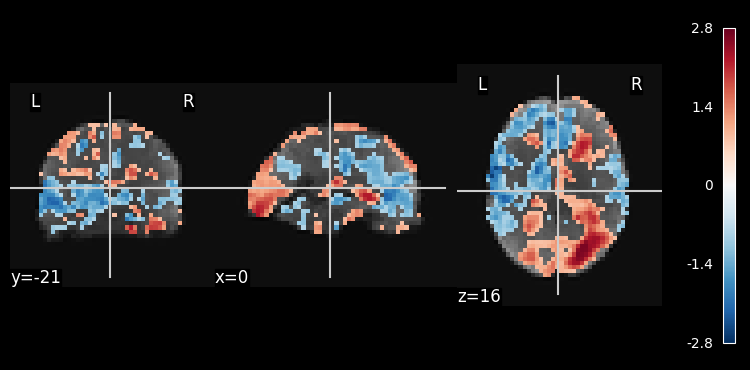

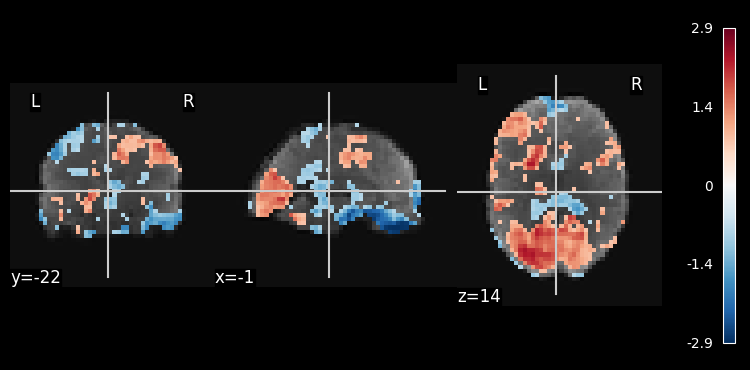

In [70]:
# Finalmete, visualizamos el resultado de las operaciones de reducción
from nilearn import image
from nilearn.plotting import plot_stat_map, show
mean_img = image.mean_img(file_name)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img)